# TAREA 6

In [1]:
# LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
plt.style.use('ggplot')

In [2]:
# METODO NEWTON
def divided_diff(x, y):
    '''
    función para calcular el dividido
    tabla de diferencias
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    funcion que evalua el polinomio de newton en x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

# FUNCIÓN GENERAL

In [3]:
def INTERPOLACION(x,y,tipo):
    '''
    x = lista con valores de x
    y = lista con valores de y
    tipo = tipo de interpolación (lineal, cubico, lagrange, newton)
    '''
    
    x = np.array(x)
    y = np.array(y)
    
    # CASO LINEAL
    if tipo == 'lineal':
        xp = np.linspace(np.min(x), np.max(x), 100)
        z = np.polyfit(x, y, 1)
        zp = np.poly1d(z)
        plt.figure(figsize=(15,8))
        plt.plot(x, y, 'bo', label="Datos Reales")
        plt.plot(xp, zp(xp), label="Ajuste Lineal")
        plt.title("LINEAL")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    # CASO CÚBICO
    elif tipo == 'cubico':
        xp = np.linspace(np.min(x), np.max(x), 100)
        z = np.polyfit(x, y, 3)
        zp = np.poly1d(z)
        plt.figure(figsize=(15,8))
        plt.plot(x, y, 'bo', label="Datos Reales")
        plt.plot(xp, zp(xp), label="Ajuste Cúbico")
        plt.title("CÚBICO")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    # CASO LAGRANGE
    elif tipo == 'lagrange':
        xp = np.linspace(np.min(x), np.max(x), 100)
        f = lagrange(x, y)
        plt.figure(figsize=(15,8))
        plt.plot(x, y, 'bo', label="Datos Reales")
        plt.plot(xp, f(xp), label="Ajuste Lagrange")
        plt.title("LAGRANGE")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    # CASO NEWTON
    elif tipo == 'newton':
        a_s = divided_diff(x, y)[0, :]
        x_newton = np.linspace(np.min(x), np.max(x), 100)
        y_newton = newton_poly(a_s, x, x_newton)
        plt.figure(figsize=(15,8))
        plt.plot(x, y, 'bo', label="Datos Reales")
        plt.plot(x_newton, y_newton, label="Ajuste Newton")
        plt.title("NEWTON")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    # OPCION NO VÁLIDA
    else:
        print("OPCIÓN NO VÁLIDA")

# EJEMPLOS

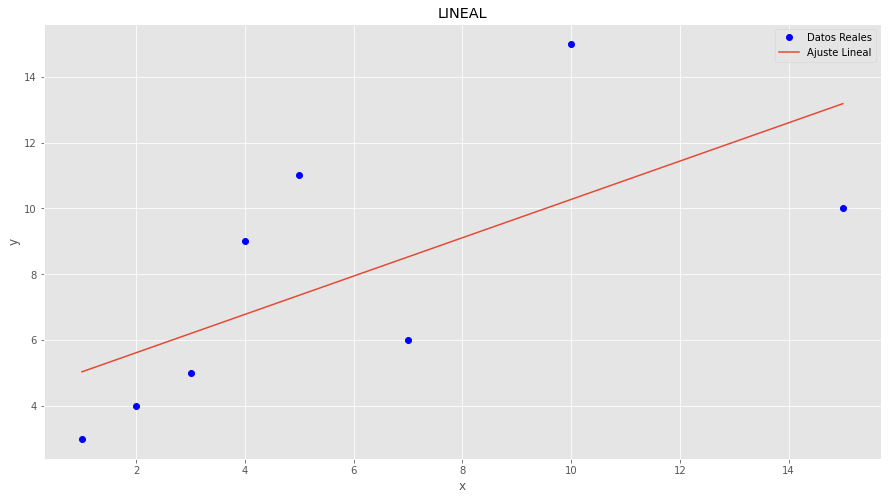

In [4]:
INTERPOLACION(x=[1,2,3,4,7,15,5,10],y=[3,4,5,9,6,10,11,15],tipo = 'lineal')

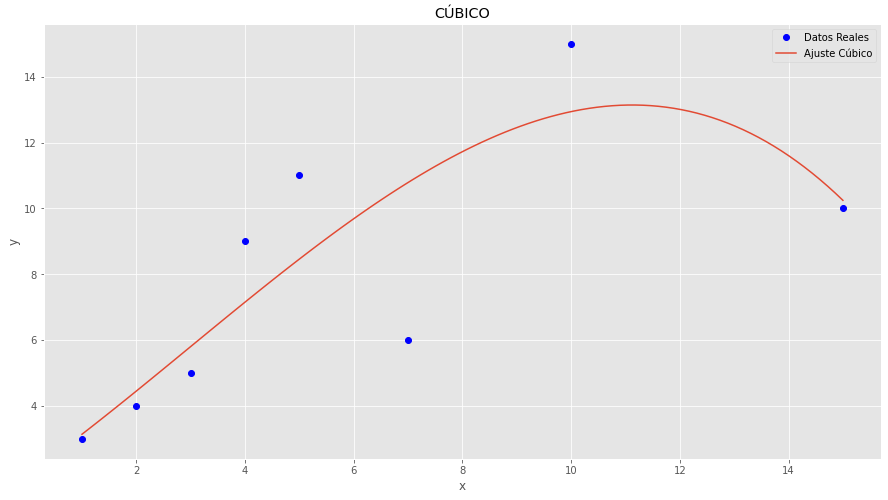

In [5]:
INTERPOLACION(x=[1,2,3,4,7,15,5,10],y=[3,4,5,9,6,10,11,15],tipo = 'cubico')

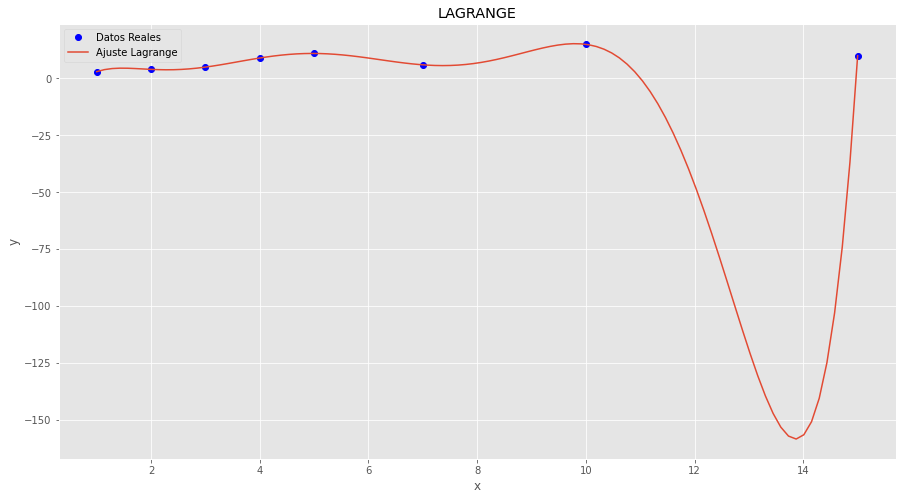

In [6]:
INTERPOLACION(x=[1,2,3,4,7,15,5,10],y=[3,4,5,9,6,10,11,15],tipo = 'lagrange')

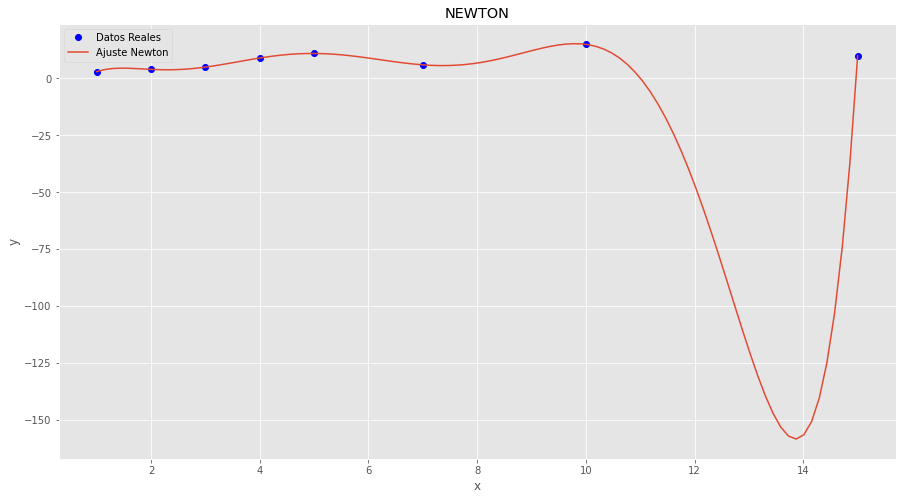

In [7]:
INTERPOLACION(x=[1,2,3,4,7,15,5,10],y=[3,4,5,9,6,10,11,15],tipo = 'newton')